### Load the dataset and preprocess the dataset

In [10]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [11]:
print('Training set image shape:', x_train.shape)
print('Training set label shape:', y_train.shape) 
print('Test set image shape:', x_test.shape) 
print('Test set label shape:', y_test.shape) 

Training set image shape: (50000, 32, 32, 3)
Training set label shape: (50000, 1)
Test set image shape: (10000, 32, 32, 3)
Test set label shape: (10000, 1)


#### Do some visualization

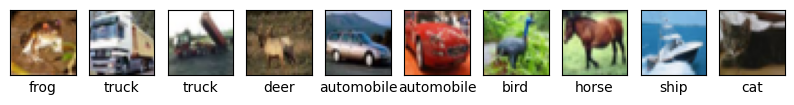

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define category names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 10 images of the training set
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # Display the category names of the images
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

#### Show the distribution of categories

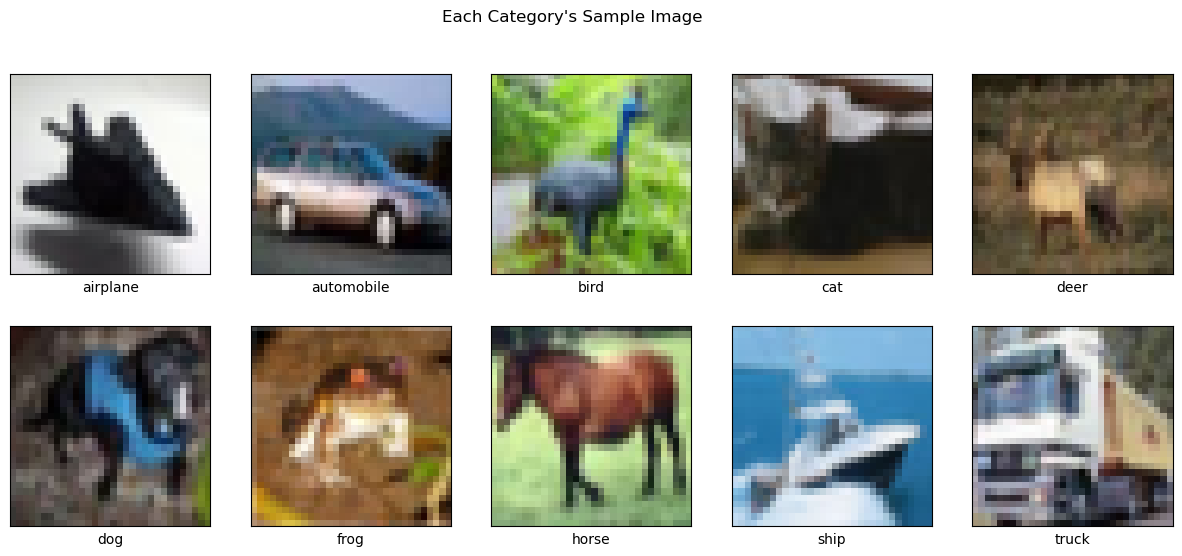

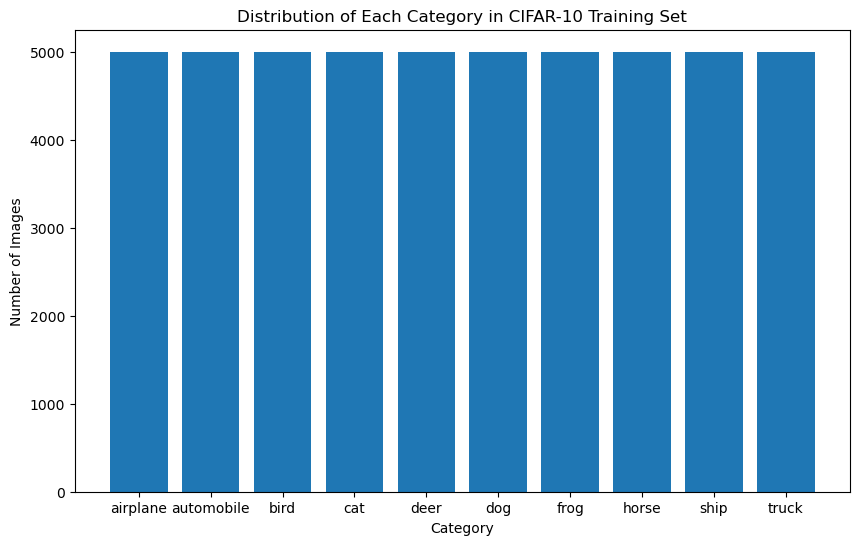

In [13]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 6))
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[idx])
    plt.xlabel(class_names[i])
plt.suptitle("Each Category's Sample Image")
plt.show()

unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts)
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Distribution of Each Category in CIFAR-10 Training Set")
plt.show()

#### Normalize the data

In [14]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### Divide the validation set and train it

In [15]:
x_train, x_val = x_train[:40000], x_train[40000:]
y_train, y_val = y_train[:40000], y_train[40000:]

In [16]:
def create_alexnet(l2_value=0.01, dropout_rate=0.5):
    model = Sequential([
        Conv2D(96, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_value), input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_value)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(384, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_value)),
        Conv2D(384, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_value)),
        Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_value)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu', kernel_regularizer=l2(l2_value)),
        Dropout(dropout_rate),
        Dense(4096, activation='relu', kernel_regularizer=l2(l2_value)),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')  
    ])
    return model
    

In [17]:
from tensorflow.keras.optimizers.legacy import SGD, Adam

# Setting hyperparameters
optimizers = {
    "SGD_0.01": SGD(learning_rate=0.01),
    "Adam_0.001": Adam(learning_rate=0.001)
}
l2_values = [0.01, 0.001]        
dropout_rates = [0.5, 0.3]       


Epoch 1/20
625/625 [==============================] - 139s 222ms/step - loss: 84.8987 - accuracy: 0.1273 - val_loss: 74.9399 - val_accuracy: 0.1950
Epoch 2/20
625/625 [==============================] - 140s 224ms/step - loss: 66.4595 - accuracy: 0.2224 - val_loss: 58.6573 - val_accuracy: 0.2674
Epoch 3/20
625/625 [==============================] - 141s 225ms/step - loss: 52.1494 - accuracy: 0.2651 - val_loss: 46.0907 - val_accuracy: 0.2918
Epoch 4/20
625/625 [==============================] - 140s 224ms/step - loss: 41.0313 - accuracy: 0.2877 - val_loss: 36.3109 - val_accuracy: 0.3119
Epoch 5/20
625/625 [==============================] - 141s 226ms/step - loss: 32.3677 - accuracy: 0.3093 - val_loss: 28.6998 - val_accuracy: 0.3207
Epoch 6/20
625/625 [==============================] - 141s 225ms/step - loss: 25.6021 - accuracy: 0.3372 - val_loss: 22.7638 - val_accuracy: 0.3442
Epoch 7/20
625/625 [==============================] - 140s 224ms/step - loss: 20.3295 - accuracy: 0.3561 - val_l

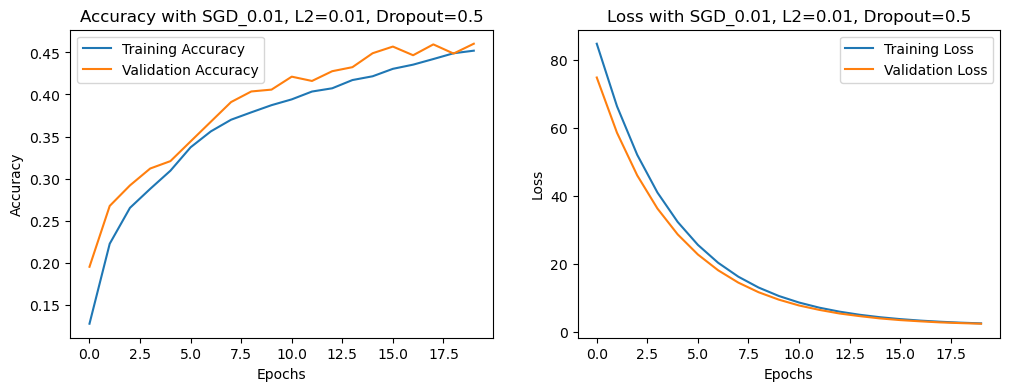

Epoch 1/20
625/625 [==============================] - 139s 223ms/step - loss: 84.8818 - accuracy: 0.1401 - val_loss: 74.8529 - val_accuracy: 0.2169
Epoch 2/20
625/625 [==============================] - 141s 226ms/step - loss: 66.4130 - accuracy: 0.2439 - val_loss: 58.6246 - val_accuracy: 0.2754
Epoch 3/20
625/625 [==============================] - 141s 225ms/step - loss: 52.1192 - accuracy: 0.2796 - val_loss: 46.0777 - val_accuracy: 0.3063
Epoch 4/20
625/625 [==============================] - 140s 224ms/step - loss: 41.0004 - accuracy: 0.3082 - val_loss: 36.3967 - val_accuracy: 0.2984
Epoch 5/20
625/625 [==============================] - 139s 223ms/step - loss: 32.3342 - accuracy: 0.3309 - val_loss: 28.6693 - val_accuracy: 0.3461
Epoch 6/20
625/625 [==============================] - 139s 223ms/step - loss: 25.5768 - accuracy: 0.3511 - val_loss: 22.7353 - val_accuracy: 0.3581
Epoch 7/20
625/625 [==============================] - 140s 224ms/step - loss: 20.3101 - accuracy: 0.3733 - val_l

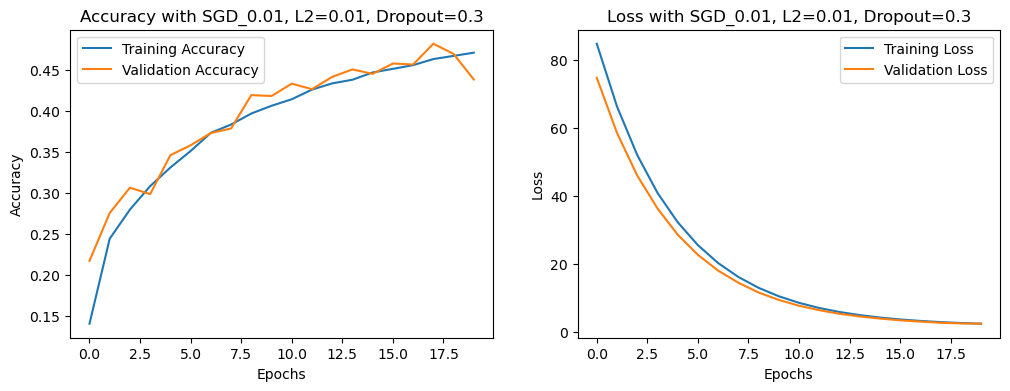

Epoch 1/20
625/625 [==============================] - 138s 220ms/step - loss: 11.4911 - accuracy: 0.1462 - val_loss: 11.2003 - val_accuracy: 0.2319
Epoch 2/20
625/625 [==============================] - 137s 219ms/step - loss: 11.0373 - accuracy: 0.2453 - val_loss: 10.8235 - val_accuracy: 0.2940
Epoch 3/20
625/625 [==============================] - 138s 221ms/step - loss: 10.7006 - accuracy: 0.2988 - val_loss: 10.4596 - val_accuracy: 0.3568
Epoch 4/20
625/625 [==============================] - 137s 219ms/step - loss: 10.3376 - accuracy: 0.3541 - val_loss: 10.1261 - val_accuracy: 0.3899
Epoch 5/20
625/625 [==============================] - 137s 220ms/step - loss: 10.0218 - accuracy: 0.3937 - val_loss: 9.8132 - val_accuracy: 0.4323
Epoch 6/20
625/625 [==============================] - 138s 221ms/step - loss: 9.7374 - accuracy: 0.4257 - val_loss: 9.5570 - val_accuracy: 0.4586
Epoch 7/20
625/625 [==============================] - 141s 226ms/step - loss: 9.4707 - accuracy: 0.4520 - val_loss:

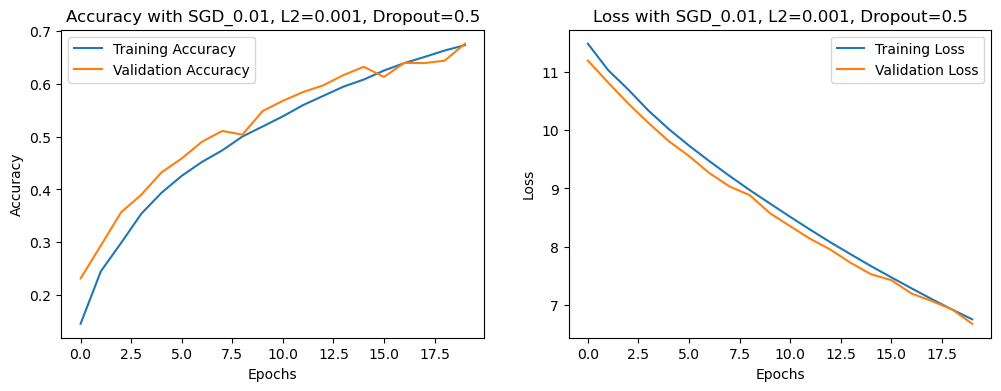

Epoch 1/20
625/625 [==============================] - 141s 225ms/step - loss: 11.4378 - accuracy: 0.1694 - val_loss: 11.1071 - val_accuracy: 0.2738
Epoch 2/20
625/625 [==============================] - 138s 220ms/step - loss: 10.9769 - accuracy: 0.2783 - val_loss: 10.7686 - val_accuracy: 0.3164
Epoch 3/20
625/625 [==============================] - 139s 222ms/step - loss: 10.6114 - accuracy: 0.3416 - val_loss: 10.7392 - val_accuracy: 0.2930
Epoch 4/20
625/625 [==============================] - 138s 220ms/step - loss: 10.2565 - accuracy: 0.3887 - val_loss: 10.1855 - val_accuracy: 0.3937
Epoch 5/20
625/625 [==============================] - 137s 220ms/step - loss: 9.9314 - accuracy: 0.4315 - val_loss: 9.7713 - val_accuracy: 0.4481
Epoch 6/20
625/625 [==============================] - 138s 221ms/step - loss: 9.6614 - accuracy: 0.4592 - val_loss: 9.5378 - val_accuracy: 0.4705
Epoch 7/20
625/625 [==============================] - 138s 220ms/step - loss: 9.4002 - accuracy: 0.4850 - val_loss: 

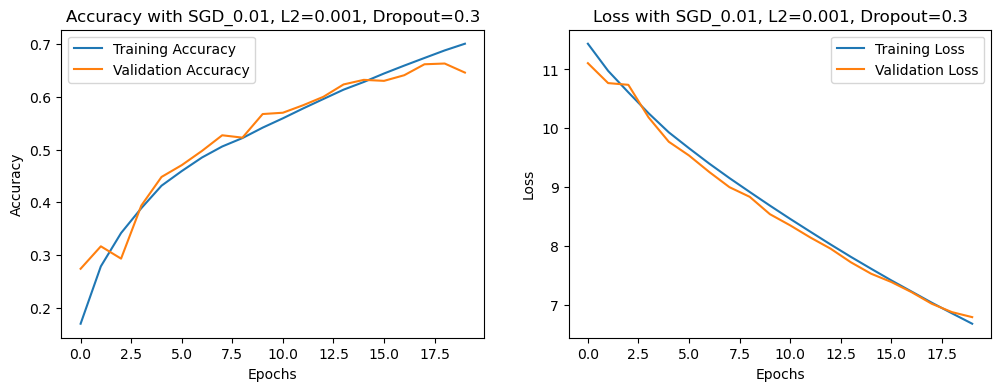

Epoch 1/20
625/625 [==============================] - 151s 241ms/step - loss: 3.0543 - accuracy: 0.0994 - val_loss: 2.3033 - val_accuracy: 0.1014
Epoch 2/20
625/625 [==============================] - 150s 240ms/step - loss: 2.3035 - accuracy: 0.0997 - val_loss: 2.3034 - val_accuracy: 0.0952
Epoch 3/20
625/625 [==============================] - 151s 241ms/step - loss: 2.3031 - accuracy: 0.0983 - val_loss: 2.3029 - val_accuracy: 0.0952
Epoch 4/20
625/625 [==============================] - 149s 239ms/step - loss: 2.3029 - accuracy: 0.0976 - val_loss: 2.3028 - val_accuracy: 0.1016
Epoch 5/20
625/625 [==============================] - 149s 239ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 6/20
625/625 [==============================] - 150s 240ms/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3029 - val_accuracy: 0.0952
Epoch 7/20
625/625 [==============================] - 151s 241ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3028 -

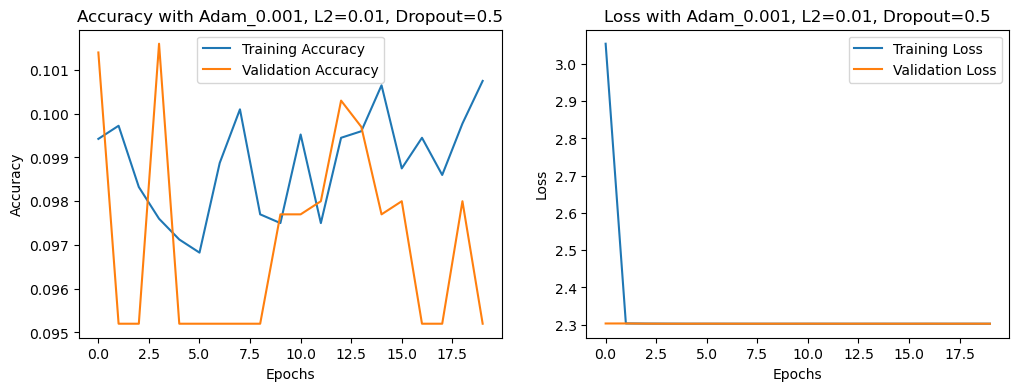

Epoch 1/20
625/625 [==============================] - 150s 240ms/step - loss: 3.1019 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1022
Epoch 2/20
625/625 [==============================] - 151s 242ms/step - loss: 2.3029 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.0980
Epoch 3/20
625/625 [==============================] - 151s 242ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 4/20
625/625 [==============================] - 150s 241ms/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 5/20
625/625 [==============================] - 149s 239ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.0980
Epoch 6/20
625/625 [==============================] - 149s 239ms/step - loss: 2.3027 - accuracy: 0.0953 - val_loss: 2.3027 - val_accuracy: 0.1014
Epoch 7/20
625/625 [==============================] - 150s 240ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3027 -

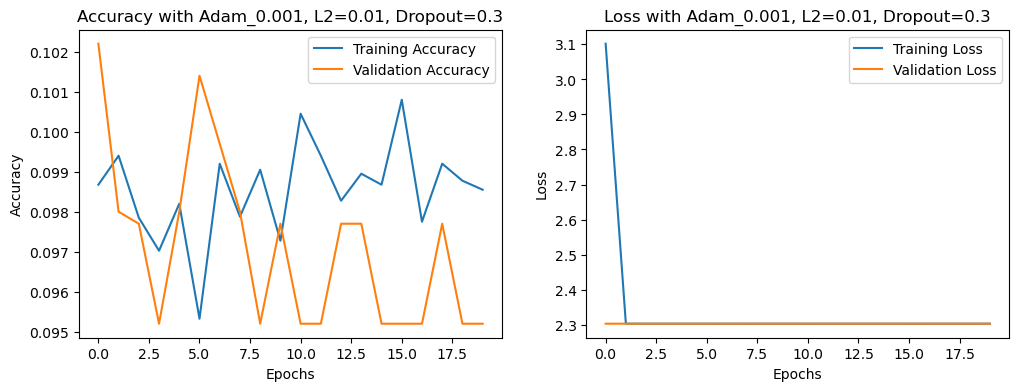

Epoch 1/20
625/625 [==============================] - 150s 239ms/step - loss: 3.4221 - accuracy: 0.1019 - val_loss: 2.4766 - val_accuracy: 0.0977
Epoch 2/20
625/625 [==============================] - 148s 237ms/step - loss: 2.3948 - accuracy: 0.0979 - val_loss: 2.3474 - val_accuracy: 0.1016
Epoch 3/20
625/625 [==============================] - 148s 237ms/step - loss: 2.3294 - accuracy: 0.1017 - val_loss: 2.3172 - val_accuracy: 0.0977
Epoch 4/20
625/625 [==============================] - 148s 237ms/step - loss: 2.3117 - accuracy: 0.0997 - val_loss: 2.3078 - val_accuracy: 0.0980
Epoch 5/20
625/625 [==============================] - 148s 237ms/step - loss: 2.3062 - accuracy: 0.0985 - val_loss: 2.3048 - val_accuracy: 0.1022
Epoch 6/20
625/625 [==============================] - 148s 237ms/step - loss: 2.3043 - accuracy: 0.0991 - val_loss: 2.3038 - val_accuracy: 0.0977
Epoch 7/20
625/625 [==============================] - 149s 238ms/step - loss: 2.3036 - accuracy: 0.0991 - val_loss: 2.3034 -

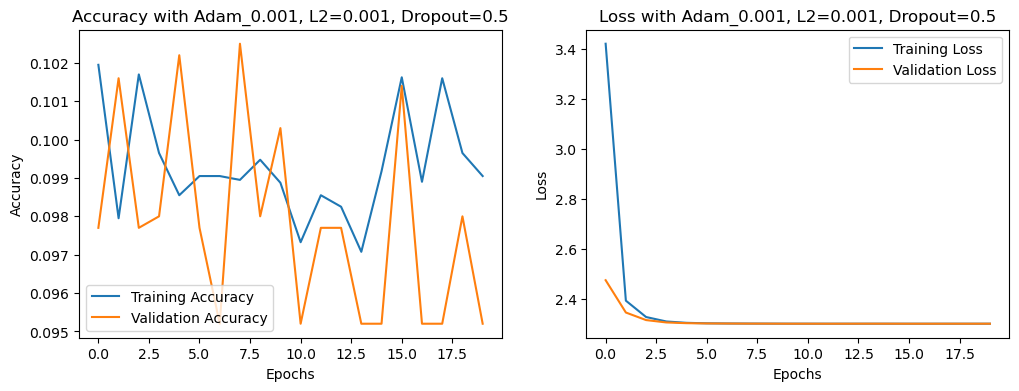

Epoch 1/20
625/625 [==============================] - 150s 240ms/step - loss: 5.8840 - accuracy: 0.1028 - val_loss: 3.6088 - val_accuracy: 0.1541
Epoch 2/20
625/625 [==============================] - 150s 240ms/step - loss: 3.0036 - accuracy: 0.2060 - val_loss: 2.5649 - val_accuracy: 0.2441
Epoch 3/20
625/625 [==============================] - 150s 239ms/step - loss: 2.3602 - accuracy: 0.2620 - val_loss: 2.1725 - val_accuracy: 0.2858
Epoch 4/20
625/625 [==============================] - 150s 239ms/step - loss: 2.0735 - accuracy: 0.2953 - val_loss: 1.9428 - val_accuracy: 0.3215
Epoch 5/20
625/625 [==============================] - 150s 240ms/step - loss: 1.9112 - accuracy: 0.3230 - val_loss: 1.8156 - val_accuracy: 0.3495
Epoch 6/20
625/625 [==============================] - 150s 240ms/step - loss: 1.8236 - accuracy: 0.3386 - val_loss: 1.7589 - val_accuracy: 0.3713
Epoch 7/20
625/625 [==============================] - 151s 241ms/step - loss: 1.7681 - accuracy: 0.3552 - val_loss: 1.7108 -

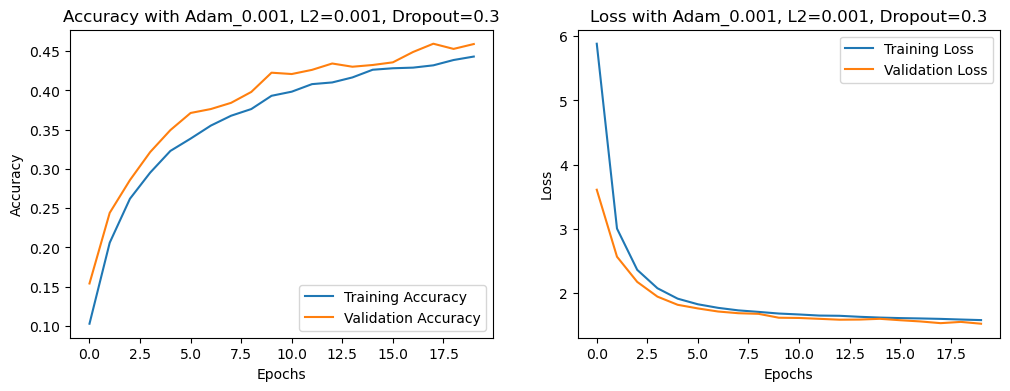

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.legacy import SGD, Adam

results = {}

# Perform hyperparameter tuning
for optimizer_name, optimizer in optimizers.items():
    for l2_value in l2_values:
        for dropout_rate in dropout_rates:
            clear_session()  
            
            # Construct AlexNet model
            model = create_alexnet(l2_value=l2_value, dropout_rate=dropout_rate)
            model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            
            # Train model and record history
            history = model.fit(
                x_train, y_train,
                validation_data=(x_val, y_val),
                epochs=20,
                batch_size=64,
                verbose=1
            )
            
            results[(optimizer_name, l2_value, dropout_rate)] = history.history
            
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='Training Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.title(f'Accuracy with {optimizer_name}, L2={l2_value}, Dropout={dropout_rate}')
            
            # Plot loss curves for training and validation
            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.title(f'Loss with {optimizer_name}, L2={l2_value}, Dropout={dropout_rate}')
            plt.show()

### Retrain model on training and validation sets

In [23]:
best_accuracy = 0
best_params = None

# Iterate through results to find the most accurate hyperparameter combination on the validation set
for params, history in results.items():
    val_accuracy = max(history['val_accuracy'])
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = params

print(f'Optimal Hyperparameter Combination：{best_params}，Highest accuracy of validation set：{best_accuracy:.4f}')

Optimal Hyperparameter Combination：('SGD_0.01', 0.001, 0.5)，Highest accuracy of validation set：0.6754


In [24]:
# Get the best combination of parameters
best_optimizer_name, best_l2_value, best_dropout_rate = best_params
best_optimizer = optimizers[best_optimizer_name]

# Clear the session and rebuild the model
clear_session()
model = create_alexnet(l2_value=best_l2_value, dropout_rate=best_dropout_rate)
model.compile(optimizer=best_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Co-train the model using the training and validation sets
model.fit(
    np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
782/782 [==============================] - 158s 202ms/step - loss: 11.4489 - accuracy: 0.1484
Epoch 2/20
782/782 [==============================] - 161s 205ms/step - loss: 10.9217 - accuracy: 0.2600
Epoch 3/20
782/782 [==============================] - 161s 206ms/step - loss: 10.4693 - accuracy: 0.3370
Epoch 4/20
782/782 [==============================] - 159s 204ms/step - loss: 10.0546 - accuracy: 0.3887
Epoch 5/20
782/782 [==============================] - 161s 206ms/step - loss: 9.6964 - accuracy: 0.4283
Epoch 6/20
782/782 [==============================] - 160s 205ms/step - loss: 9.3713 - accuracy: 0.4584
Epoch 7/20
782/782 [==============================] - 160s 204ms/step - loss: 9.0567 - accuracy: 0.4897
Epoch 8/20
782/782 [==============================] - 160s 205ms/step - loss: 8.7646 - accuracy: 0.5159
Epoch 9/20
782/782 [==============================] - 160s 205ms/step - loss: 8.4793 - accuracy: 0.5413
Epoch 10/20
782/782 [==============================] - 160s 

### Final evaluation on test set

In [25]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'testset accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 10s 31ms/step - loss: 5.9524 - accuracy: 0.7045
testset accuracy: 0.7045


313/313 [==============================] - 9s 27ms/step


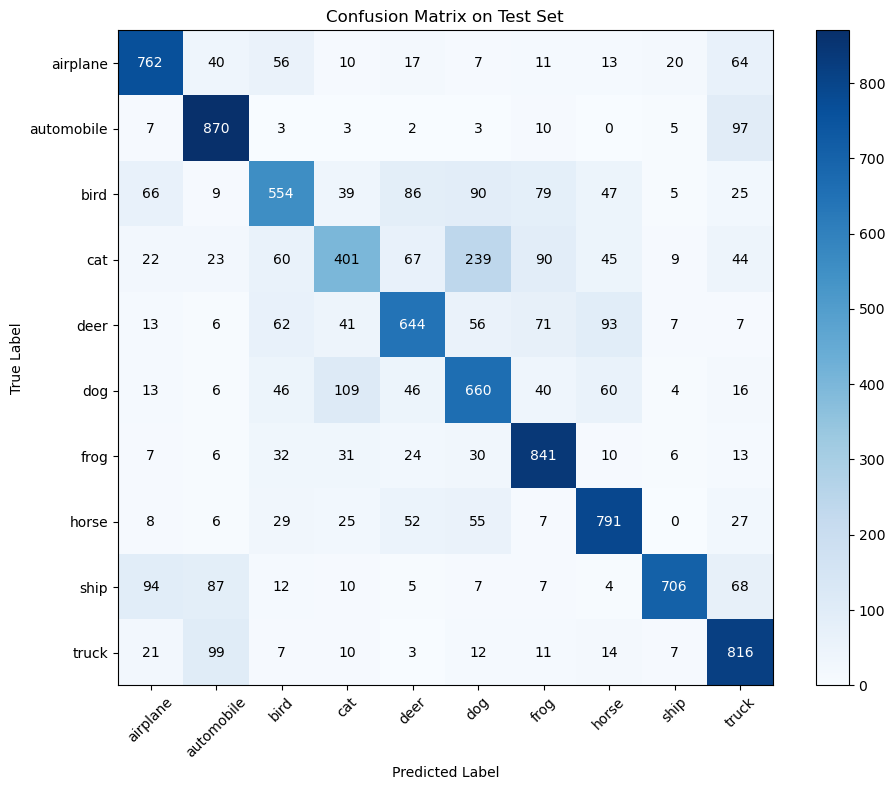

In [33]:
y_pred_classes = np.argmax(model.predict(x_test), axis=1)
y_true = y_test  

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Test Set")
plt.colorbar()

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.tight_layout()
plt.show()

In [34]:
from sklearn.metrics import classification_report
#  Print the classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.75      0.76      0.76      1000
  automobile       0.76      0.87      0.81      1000
        bird       0.64      0.55      0.60      1000
         cat       0.59      0.40      0.48      1000
        deer       0.68      0.64      0.66      1000
         dog       0.57      0.66      0.61      1000
        frog       0.72      0.84      0.78      1000
       horse       0.73      0.79      0.76      1000
        ship       0.92      0.71      0.80      1000
       truck       0.69      0.82      0.75      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



313/313 [==============================] - 9s 29ms/step


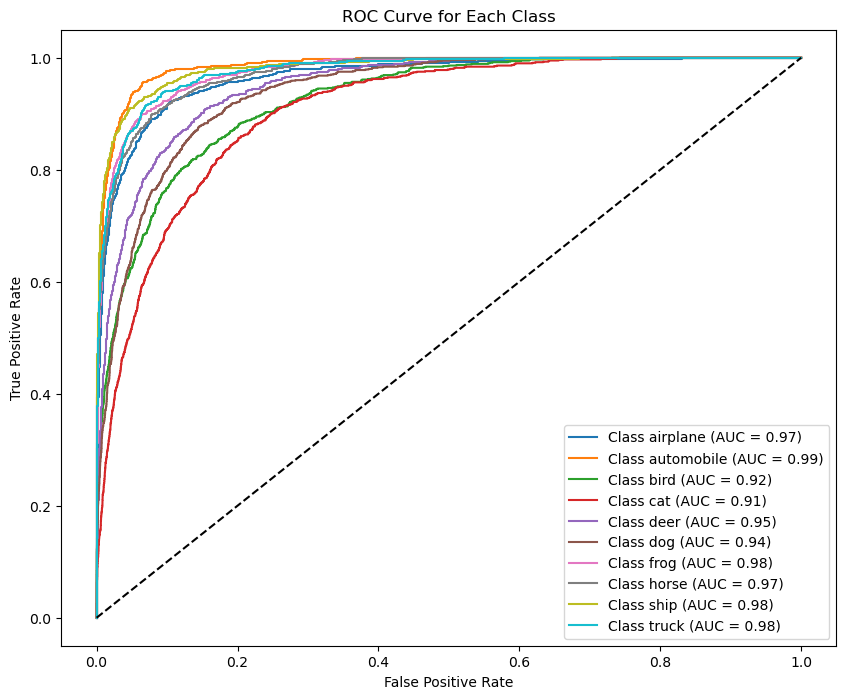

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_true_binary = label_binarize(y_true, classes=np.arange(10))
y_pred_probs = model.predict(x_test)

# Plot ROC curves for each category
plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_true_binary[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend(loc="lower right")
plt.show()